In [1]:
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
file = "/content/Gold_dataset_For_Sentiment_Analysis.csv"
df = pd.read_csv(file)
df.head()

,Dates,URL,News,Price Direction Up,Price Direction Constant,Price Direction Down,Asset Comparision,Past Information,Future Information,Price Sentiment
0,28-01-2016,http://www.marketwatch.com/story/april-gold-do...,"april gold down 20 cents to settle at $1,116.1...",0,0,1,0,1,0,negative
1,13-09-2017,http://www.marketwatch.com/story/gold-prices-s...,gold suffers third straight daily decline,0,0,1,0,1,0,negative
2,26-07-2016,http://www.marketwatch.com/story/gold-futures-...,Gold futures edge up after two-session decline,1,0,0,0,1,0,positive
3,28-02-2018,https://www.metalsdaily.com/link/277199/dent-r...,dent research : is gold's day in the sun comin...,0,0,0,0,0,1,none
4,06-09-2017,http://www.marketwatch.com/story/gold-steadies...,"Gold snaps three-day rally as Trump, lawmakers...",0,0,1,0,1,0,negative


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10570 entries, 0 to 10569
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Dates                     10570 non-null  object
 1   URL                       10570 non-null  object
 2   News                      10570 non-null  object
 3   Price Direction Up        10570 non-null  int64 
 4   Price Direction Constant  10570 non-null  int64 
 5   Price Direction Down      10570 non-null  int64 
 6   Asset Comparision         10570 non-null  int64 
 7   Past Information          10570 non-null  int64 
 8   Future Information        10570 non-null  int64 
 9   Price Sentiment           10570 non-null  object
dtypes: int64(6), object(4)
memory usage: 825.9+ KB


In [6]:
df.nunique()

Dates                        3761
URL                         10570
News                        10570
Price Direction Up              2
Price Direction Constant        2
Price Direction Down            2
Asset Comparision               2
Past Information                2
Future Information              2
Price Sentiment                 4
dtype: int64

In [7]:
df.drop_duplicates(subset=['Dates'], inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3761 entries, 0 to 10569
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Dates                     3761 non-null   object
 1   URL                       3761 non-null   object
 2   News                      3761 non-null   object
 3   Price Direction Up        3761 non-null   int64 
 4   Price Direction Constant  3761 non-null   int64 
 5   Price Direction Down      3761 non-null   int64 
 6   Asset Comparision         3761 non-null   int64 
 7   Past Information          3761 non-null   int64 
 8   Future Information        3761 non-null   int64 
 9   Price Sentiment           3761 non-null   object
dtypes: int64(6), object(4)
memory usage: 323.2+ KB


In [9]:
df.shape

(3761, 10)

In [10]:
df['Dates'] = pd.to_datetime(df['Dates'], format='%d-%m-%Y', errors='coerce')

unique_dates = df['Dates'].dt.strftime('%d-%m-%Y').unique()

print("Unique dates:", unique_dates)
df.head()

Unique dates: ['28-01-2016' '13-09-2017' '26-07-2016' ... '05-11-2009' '11-06-2002'
 '01-10-2007']


,Dates,URL,News,Price Direction Up,Price Direction Constant,Price Direction Down,Asset Comparision,Past Information,Future Information,Price Sentiment
0,2016-01-28,http://www.marketwatch.com/story/april-gold-do...,"april gold down 20 cents to settle at $1,116.1...",0,0,1,0,1,0,negative
1,2017-09-13,http://www.marketwatch.com/story/gold-prices-s...,gold suffers third straight daily decline,0,0,1,0,1,0,negative
2,2016-07-26,http://www.marketwatch.com/story/gold-futures-...,Gold futures edge up after two-session decline,1,0,0,0,1,0,positive
3,2018-02-28,https://www.metalsdaily.com/link/277199/dent-r...,dent research : is gold's day in the sun comin...,0,0,0,0,0,1,none
4,2017-09-06,http://www.marketwatch.com/story/gold-steadies...,"Gold snaps three-day rally as Trump, lawmakers...",0,0,1,0,1,0,negative


In [11]:
df.isna().sum()

Dates                       89
URL                          0
News                         0
Price Direction Up           0
Price Direction Constant     0
Price Direction Down         0
Asset Comparision            0
Past Information             0
Future Information           0
Price Sentiment              0
dtype: int64

In [12]:
df.describe()

,Price Direction Up,Price Direction Constant,Price Direction Down,Asset Comparision,Past Information,Future Information
count,3761.000000,3761.000000,3761.000000,3761.000000,3761.000000,3761.000000
mean,0.437118,0.040415,0.368785,0.206860,0.971550,0.028450
std,0.496096,0.196956,0.482540,0.405108,0.166276,0.166276
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
df.dropna(inplace=True)

In [14]:
df.head()

,Dates,URL,News,Price Direction Up,Price Direction Constant,Price Direction Down,Asset Comparision,Past Information,Future Information,Price Sentiment
0,2016-01-28,http://www.marketwatch.com/story/april-gold-do...,"april gold down 20 cents to settle at $1,116.1...",0,0,1,0,1,0,negative
1,2017-09-13,http://www.marketwatch.com/story/gold-prices-s...,gold suffers third straight daily decline,0,0,1,0,1,0,negative
2,2016-07-26,http://www.marketwatch.com/story/gold-futures-...,Gold futures edge up after two-session decline,1,0,0,0,1,0,positive
3,2018-02-28,https://www.metalsdaily.com/link/277199/dent-r...,dent research : is gold's day in the sun comin...,0,0,0,0,0,1,none
4,2017-09-06,http://www.marketwatch.com/story/gold-steadies...,"Gold snaps three-day rally as Trump, lawmakers...",0,0,1,0,1,0,negative


In [15]:
file_path = "/content/Final_gold.csv"
add_df = pd.read_csv(file_path)

In [16]:
add_df.head()

,Date,Close,Volume,Open,High,Low,Month,Year,Day
0,2024-01-19,2029.3,166078.0,2027.4,2041.9,2022.2,1,2024,19
1,2024-01-18,2021.6,167013.0,2009.1,2025.6,2007.7,1,2024,18
2,2024-01-17,2006.5,245194.0,2031.7,2036.1,2004.6,1,2024,17
3,2024-01-16,2030.2,277995.0,2053.4,2062.8,2027.6,1,2024,16
4,2024-01-12,2051.6,250946.0,2033.2,2067.3,2033.1,1,2024,12


In [18]:
add_df['Date'] = pd.to_datetime(add_df['Date'])

In [19]:
merged_df = pd.merge(df, add_df, how='inner', left_on='Dates', right_on='Date')

# Display the merged dataframe
merged_df.head()

,Dates,URL,News,Price Direction Up,Price Direction Constant,Price Direction Down,Asset Comparision,Past Information,Future Information,Price Sentiment,Date,Close,Volume,Open,High,Low,Month,Year,Day
0,2016-01-28,http://www.marketwatch.com/story/april-gold-do...,"april gold down 20 cents to settle at $1,116.1...",0,0,1,0,1,0,negative,2016-01-28,1116.1,146072.0,1115.7,1126.4,1110.2,1,2016,28
1,2017-09-13,http://www.marketwatch.com/story/gold-prices-s...,gold suffers third straight daily decline,0,0,1,0,1,0,negative,2017-09-13,1328.0,298024.0,1336.2,1340.5,1324.5,9,2017,13
2,2016-07-26,http://www.marketwatch.com/story/gold-futures-...,Gold futures edge up after two-session decline,1,0,0,0,1,0,positive,2016-07-26,1320.8,88658.0,1315.5,1324.4,1313.6,7,2016,26
3,2018-02-28,https://www.metalsdaily.com/link/277199/dent-r...,dent research : is gold's day in the sun comin...,0,0,0,0,0,1,none,2018-02-28,1317.9,251263.0,1318.9,1323.7,1316.7,2,2018,28
4,2017-09-06,http://www.marketwatch.com/story/gold-steadies...,"Gold snaps three-day rally as Trump, lawmakers...",0,0,1,0,1,0,negative,2017-09-06,1339.0,297521.0,1345.0,1347.7,1336.4,9,2017,6


In [24]:
final_df = merged_df

In [25]:
final_df.drop(columns=['Date'], inplace=True)
final_df.head()

,Dates,URL,News,Price Direction Up,Price Direction Constant,Price Direction Down,Asset Comparision,Past Information,Future Information,Price Sentiment,Close,Volume,Open,High,Low,Month,Year,Day
0,2016-01-28,http://www.marketwatch.com/story/april-gold-do...,"april gold down 20 cents to settle at $1,116.1...",0,0,1,0,1,0,negative,1116.1,146072.0,1115.7,1126.4,1110.2,1,2016,28
1,2017-09-13,http://www.marketwatch.com/story/gold-prices-s...,gold suffers third straight daily decline,0,0,1,0,1,0,negative,1328.0,298024.0,1336.2,1340.5,1324.5,9,2017,13
2,2016-07-26,http://www.marketwatch.com/story/gold-futures-...,Gold futures edge up after two-session decline,1,0,0,0,1,0,positive,1320.8,88658.0,1315.5,1324.4,1313.6,7,2016,26
3,2018-02-28,https://www.metalsdaily.com/link/277199/dent-r...,dent research : is gold's day in the sun comin...,0,0,0,0,0,1,none,1317.9,251263.0,1318.9,1323.7,1316.7,2,2018,28
4,2017-09-06,http://www.marketwatch.com/story/gold-steadies...,"Gold snaps three-day rally as Trump, lawmakers...",0,0,1,0,1,0,negative,1339.0,297521.0,1345.0,1347.7,1336.4,9,2017,6


In [26]:
final_df.shape

(1173, 18)

In [28]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1173 entries, 0 to 1172
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Dates                     1173 non-null   datetime64[ns]
 1   URL                       1173 non-null   object        
 2   News                      1173 non-null   object        
 3   Price Direction Up        1173 non-null   int64         
 4   Price Direction Constant  1173 non-null   int64         
 5   Price Direction Down      1173 non-null   int64         
 6   Asset Comparision         1173 non-null   int64         
 7   Past Information          1173 non-null   int64         
 8   Future Information        1173 non-null   int64         
 9   Price Sentiment           1173 non-null   object        
 10  Close                     1173 non-null   float64       
 11  Volume                    1173 non-null   float64       
 12  Open                

In [29]:
final_df.isna().sum()

Dates                       0
URL                         0
News                        0
Price Direction Up          0
Price Direction Constant    0
Price Direction Down        0
Asset Comparision           0
Past Information            0
Future Information          0
Price Sentiment             0
Close                       0
Volume                      0
Open                        0
High                        0
Low                         0
Month                       0
Year                        0
Day                         0
dtype: int64

In [30]:
final_df= pd.get_dummies(final_df, columns=['Price Sentiment'])

In [31]:
final_df.head()

,Dates,URL,News,Price Direction Up,Price Direction Constant,Price Direction Down,Asset Comparision,Past Information,Future Information,Close,...,Open,High,Low,Month,Year,Day,Price Sentiment_negative,Price Sentiment_neutral,Price Sentiment_none,Price Sentiment_positive
0,2016-01-28,http://www.marketwatch.com/story/april-gold-do...,"april gold down 20 cents to settle at $1,116.1...",0,0,1,0,1,0,1116.1,...,1115.7,1126.4,1110.2,1,2016,28,1,0,0,0
1,2017-09-13,http://www.marketwatch.com/story/gold-prices-s...,gold suffers third straight daily decline,0,0,1,0,1,0,1328.0,...,1336.2,1340.5,1324.5,9,2017,13,1,0,0,0
2,2016-07-26,http://www.marketwatch.com/story/gold-futures-...,Gold futures edge up after two-session decline,1,0,0,0,1,0,1320.8,...,1315.5,1324.4,1313.6,7,2016,26,0,0,0,1
3,2018-02-28,https://www.metalsdaily.com/link/277199/dent-r...,dent research : is gold's day in the sun comin...,0,0,0,0,0,1,1317.9,...,1318.9,1323.7,1316.7,2,2018,28,0,0,1,0
4,2017-09-06,http://www.marketwatch.com/story/gold-steadies...,"Gold snaps three-day rally as Trump, lawmakers...",0,0,1,0,1,0,1339.0,...,1345.0,1347.7,1336.4,9,2017,6,1,0,0,0


In [32]:
import nltk
nltk.download('punkt')
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import stopwords
import pandas as pd
from textblob import TextBlob
from datetime import datetime
import numpy as np
from scipy import stats
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import cross_val_score

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


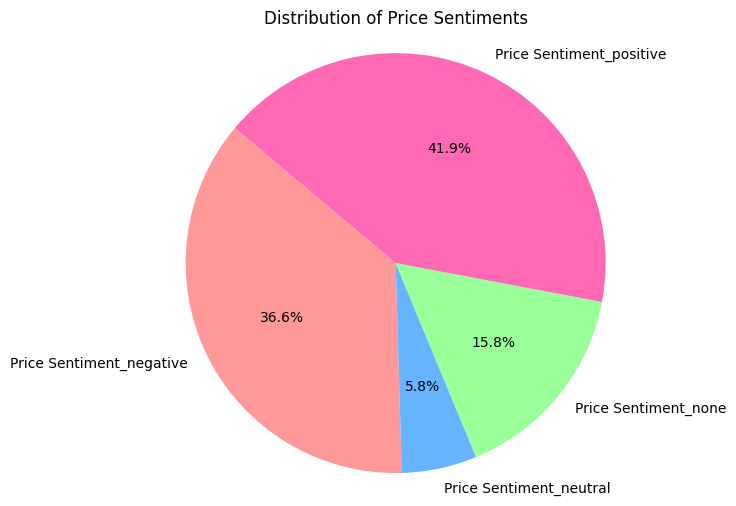

In [34]:
# Calculate the counts for each sentiment category
sentiment_counts = final_df[['Price Sentiment_negative', 'Price Sentiment_neutral', 'Price Sentiment_none', 'Price Sentiment_positive']].sum()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999', '#66b3ff', '#99ff99', '#FF69B4'])
plt.title('Distribution of Price Sentiments')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

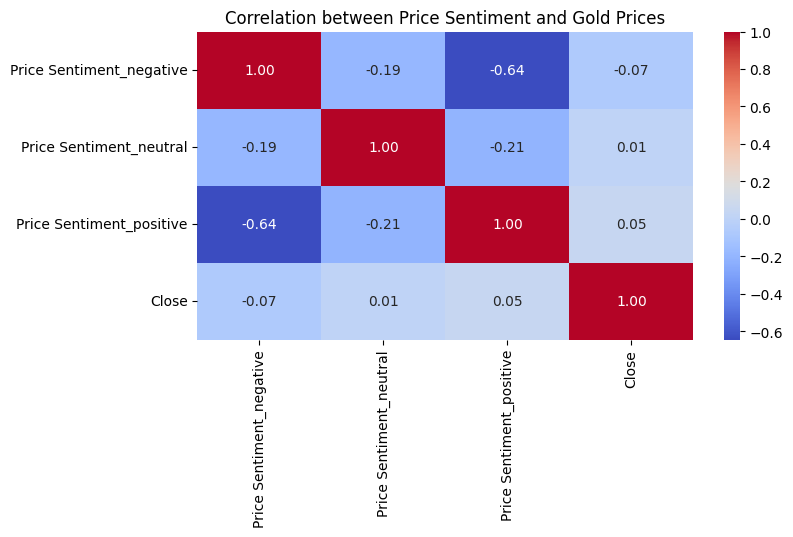

In [35]:
sentiment_price_corr = final_df[['Price Sentiment_negative', 'Price Sentiment_neutral', 'Price Sentiment_positive', 'Close']].corr()

# Visualize correlation matrix
plt.figure(figsize=(8, 4))
sns.heatmap(sentiment_price_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation between Price Sentiment and Gold Prices")
plt.show()

In [36]:
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

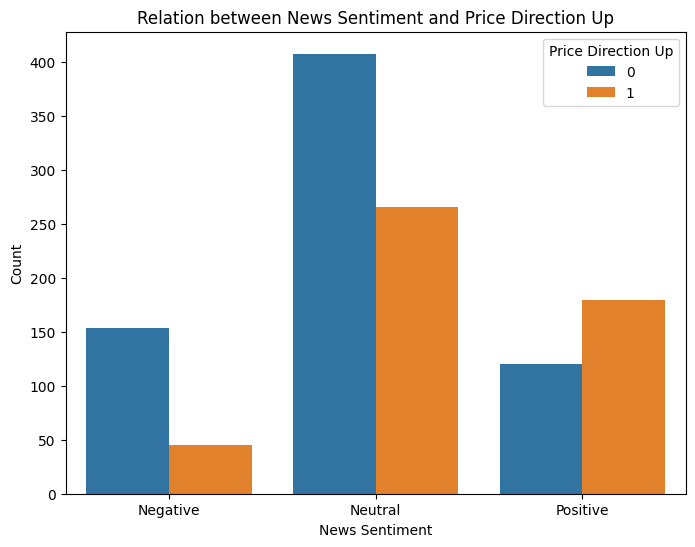

In [39]:
final_df['News Sentiment'] = final_df['News'].apply(get_sentiment)

plt.figure(figsize=(8, 6))
sns.countplot(x='News Sentiment', hue='Price Direction Up', data=final_df)
plt.title('Relation between News Sentiment and Price Direction Up')
plt.xlabel('News Sentiment')
plt.ylabel('Count')
plt.legend(title='Price Direction Up', loc='upper right')
plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


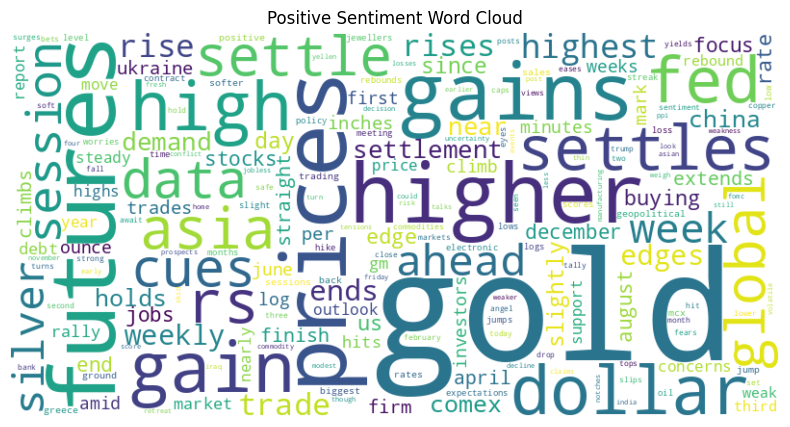

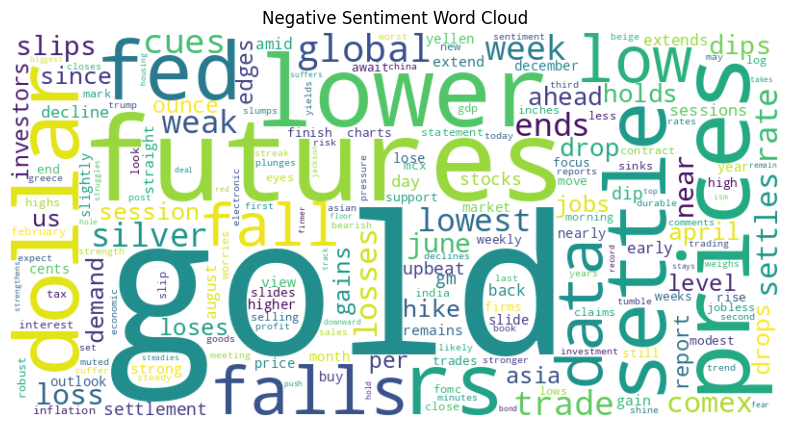

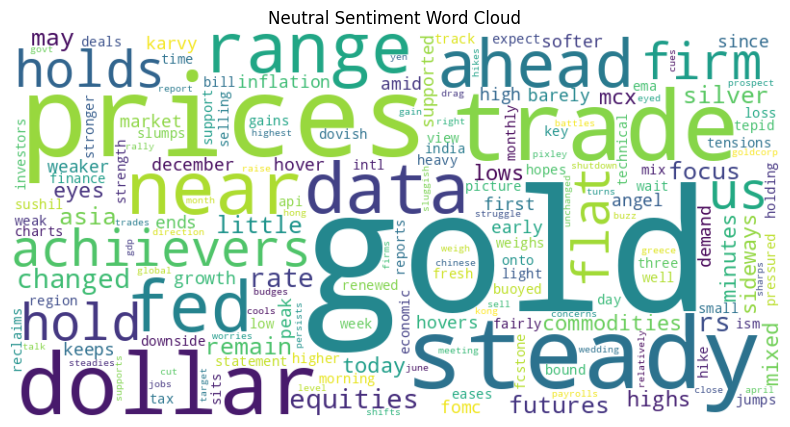

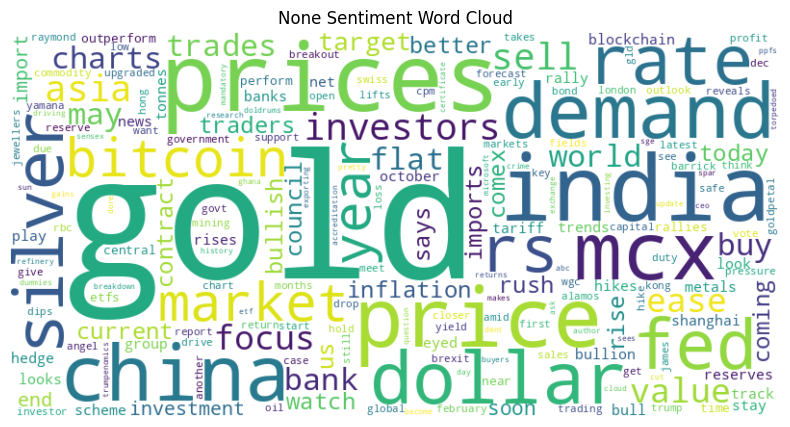

In [41]:
positive_news = final_df[final_df['Price Sentiment_positive'] == 1]['News']
negative_news = final_df[final_df['Price Sentiment_negative'] == 1]['News']
neutral_news = final_df[final_df['Price Sentiment_neutral'] == 1]['News']
none_news = final_df[final_df['Price Sentiment_none'] == 1]['News']

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    words = nltk.word_tokenize(text.lower())
    words = [word for word in words if word.isalpha() and word not in stop_words]
    return words

positive_words = [word for news in positive_news for word in preprocess_text(news)]
negative_words = [word for news in negative_news for word in preprocess_text(news)]
neutral_words = [word for news in neutral_news for word in preprocess_text(news)]
none_words = [word for news in none_news for word in preprocess_text(news)]

positive_word_freq = Counter(positive_words)
negative_word_freq = Counter(negative_words)
neutral_word_freq = Counter(neutral_words)
none_word_freq = Counter(none_words)

def generate_word_cloud(word_freq, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

generate_word_cloud(positive_word_freq, 'Positive Sentiment Word Cloud')

generate_word_cloud(negative_word_freq, 'Negative Sentiment Word Cloud')

generate_word_cloud(neutral_word_freq, 'Neutral Sentiment Word Cloud')

generate_word_cloud(none_word_freq, 'None Sentiment Word Cloud')